In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.io import loadmat
from sklearn.preprocessing import OneHotEncoder

In [3]:
data = loadmat('./ex4data1.mat')
X = data['X']
y = data['y'].flatten() #flatten() 将多维转为一维数组

In [39]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
def plot_100_image(X):
    sample_index = np.random.choice(X.shape[0],100) #从 N（个样本）中，随机选出100个数字
    sample_images = X[sample_index,:]#选择其中随机的100行 (100,400)
    
    fig, ax_arraya = plt.subplots(nrows=10,ncols=10,sharex=True,sharey=True,figsize=(8,8))
    for row in range(10):
        for col in range(10):
            ax_arraya[row,col].matshow(sample_images[10*row + col].reshape(20,20), cmap = 'gray_r')
    plt.xticks([])
    plt.yticks([])
    plt.show()

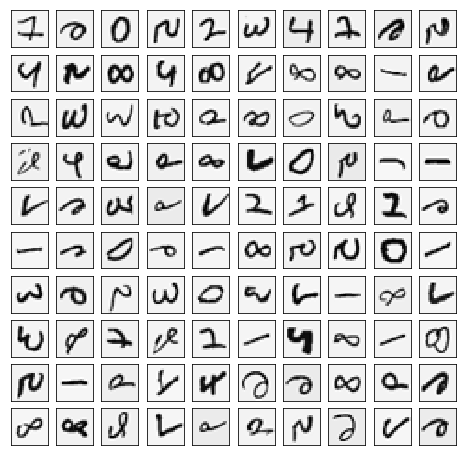

In [5]:
plot_100_image(X)

In [6]:
def excand_y(y): #oneHot编码y
    encoder = OneHotEncoder(sparse=False)
    oneHot_y = encoder.fit_transform(y.reshape(-1,1))
    return oneHot_y

In [15]:
#导入 预先训练好的THETA1 THETA2
def loadmat_Theta():
    data = loadmat('./ex4weights.mat')
    return data['Theta1'],data['Theta2']
T1,T2 = loadmat_Theta()
T1.shape,T2.shape

((25, 401), (10, 26))

In [22]:
def serialize(t1,t2):
    return np.r_[t1.flatten(),t2.flatten()] #(1, 25*401+10*26)

In [23]:
def deserialize(Theta):
    return Theta[:25*401].reshape(25,401), Theta[25*401:].reshape(10,26)

In [29]:
## Test:
# theta = serialize(T1,T2)
# deserialize(theta)

In [30]:
def segmoid(z):
    return 1/(1+np.exp(-z))

In [47]:
def feed_forward(Theta, X):
    Theta1,Theta2 = deserialize(Theta)
    # Theta1 (25,401)
    # Theta2 (10,26)
    # X (5000,401)
    a1 = X 
    z2 = a1 @ Theta1.T
    a2 = segmoid(z2)
    a2 = np.append(np.ones((len(a2),1)),a2,axis=1)
    z3 = a2 @ Theta2.T
    a3 = segmoid(z3)
    return a1,z2,a2,z3,a3 

In [49]:
Theta = serialize(T1,T2)
X_add_one = np.append(np.ones((len(X),1)),X,axis=1)

# feed_forward(Theta,X_add_one)

In [65]:
a1, z2, a2, z3, h = feed_forward(Theta, X_add_one)
h.shape

(5000, 10)

In [63]:
def cost(Theta, X, y):
    # y (5000, 10)
    # X (5000, 401)
    # Theta (1, 25*401+10*26)
    a1, z2, a2, z3, h = feed_forward(Theta, X)
    # h (5000, 10)
    J = -y * np.log(h) - (1-y) * np.log(1-h)
    return np.sum(J)/len(X)

In [58]:
cost(Theta, X_add_one, excand_y(y))
# excand_y(y).shape,h.shape

0.2876291651613189

In [84]:
def regularized_cost(Theta, X, y, l=1):
    t1,t2 =deserialize(Theta)
    reg = l/(2*len(X)) * (np.sum(np.power(t1[:,1:],2))+np.sum(np.power(t2[:,1:],2)))
    return reg+cost(Theta, X, y)

In [85]:
regularized_cost(Theta, X_add_one, excand_y(y))

0.38376985909092365

# 反向传播